In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
from collections import Counter

In [2]:
theme = 'WorldCup'

In [3]:
tweets = pd.read_csv(f'./data/{theme}/tweets_clean.csv')

In [4]:
tweets

,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions,text_clean,text_clean_list,text_clean_stopwords,hashtags_list
0,#Qatar2022,1592601191761838081,1591065849531604994,Massage and sex in Qatar❤️\nMassage body to bo...,0,0,0,0,2022-11-15 19:31:27+00:00,en,NaN,massage and sex in qatar massage body to bod...,"['massage', 'and', 'sex', 'in', 'qatar', 'mass...","['massage', 'sex', 'qatar', 'massage', 'body',...","['qatar', 'qatar2022']"
1,#Qatar2022,1592601156412649477,968203797049769984,How to identify a whitexican in Qatar 2022 #Q...,0,1,0,0,2022-11-15 19:31:19+00:00,en,NaN,how to identify a whitexican in qatar qatar m...,"['how', 'to', 'identify', 'a', 'whitexican', '...","['identify', 'whitexican', 'qatar', 'qatar', '...","['qatar2022', 'mexico', 'worldcup2022']"
2,#Qatar2022,1592601145545031681,1585336194010955781,Gillingham vs AFC Fylde\n\n⏰ 4:45:00 PM\n\nWho...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,gillingham vs afc fylde pm whos going to wi...,"['gillingham', 'v', 'afc', 'fylde', 'pm', 'who...","['gillingham', 'v', 'afc', 'fylde', 'pm', 'goi...","['fifaworldcup', 'qatar2022']"
3,#Qatar2022,1592601145503059968,1585336194010955781,Derby vs Torquay\n\n⏰ 4:45:00 PM\n\nWho's goin...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,derby vs torquay pm whos going to win fifaw...,"['derby', 'v', 'torquay', 'pm', 'who', 'going'...","['derby', 'v', 'torquay', 'pm', 'going', 'win'...","['fifaworldcup', 'qatar2022']"
4,#Qatar2022,1592601145415008256,1585336194010955781,Cambridge United vs Curzon Ashton\n\n⏰ 4:45:00...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,cambridge united vs curzon ashton pm whos g...,"['cambridge', 'united', 'v', 'curzon', 'ashton...","['cambridge', 'united', 'v', 'curzon', 'ashton...","['fifaworldcup', 'qatar2022']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129720,#Qatar2022,1605037565999980545,1499701605079396353,The coronation of the true living #GOAT! @WeAr...,0,0,0,0,2022-12-20 03:09:10+00:00,en,"['2849963640', '1058376110']",the coronation of the true living goat dexto...,"['the', 'coronation', 'of', 'the', 'true', 'li...","['coronation', 'true', 'living', 'goat', 'dext...","['goat', 'dextools', 'worldcup2022', 'worldcup..."
129721,#Qatar2022,1605037409074573313,897741929387106305,Peter Drury on Argentina’s winning moment.\n\n...,3,0,0,0,2022-12-20 03:08:33+00:00,en,NaN,peter drury on argentina s winning moment mess...,"['peter', 'drury', 'on', 'argentina', 's', 'wi...","['peter', 'drury', 'argentina', 'winning', 'mo...","['messi𓃵', 'argentinavsfrance', 'qatar2022', '..."
129722,#Qatar2022,1605037015233310720,1363653333479788549,Argentine dairy industry #DitchDairy @dairy_tr...,0,0,0,0,2022-12-20 03:06:59+00:00,en,"['1370074650038910983', '1246189682150367233']",argentine dairy industry ditchdairy worldcupfi...,"['argentine', 'dairy', 'industry', 'ditchdairy...","['argentine', 'dairy', 'industry', 'ditchdairy...","['ditchdairy', 'worldcupfinal', 'fifaworldcup'..."
129723,#Qatar2022,1605036970660462602,1522221998151061509,This time @TeamMessi Argentina ⚽❤✌ \n\n 📕 #Dex...,0,0,0,0,2022-12-20 03:06:48+00:00,en,['1058376110'],this time argentina dextools quack wool ...,"['this', 'time', 'argentina', 'dextools', 'qua...","['time', 'argentina', 'dextools', 'quack', 'wo...","['dextools', 'worldcup2022', 'worldcup', 'qata..."


In [5]:
tweets['created_at'] = tweets.created_at.apply(lambda str_date: datetime.strptime(str_date[:10], '%Y-%m-%d').date())

In [6]:
all_downloaded_dates = list(tweets.created_at)

In [7]:
downloaded_dates_with_occ = Counter(all_downloaded_dates)

In [8]:
downloaded_dates_with_occ

Counter({datetime.date(2022, 11, 15): 19,
         datetime.date(2022, 11, 21): 14905,
         datetime.date(2022, 11, 23): 985,
         datetime.date(2022, 11, 24): 20184,
         datetime.date(2022, 11, 25): 6386,
         datetime.date(2022, 11, 26): 7600,
         datetime.date(2022, 11, 28): 12937,
         datetime.date(2022, 11, 27): 655,
         datetime.date(2022, 11, 30): 12560,
         datetime.date(2022, 11, 29): 5154,
         datetime.date(2022, 12, 1): 6791,
         datetime.date(2022, 12, 3): 15275,
         datetime.date(2022, 12, 2): 3300,
         datetime.date(2022, 12, 5): 4833,
         datetime.date(2022, 12, 4): 6843,
         datetime.date(2022, 12, 21): 1225,
         datetime.date(2022, 12, 20): 5622,
         datetime.date(2022, 12, 19): 2460,
         datetime.date(2022, 12, 18): 1991})

In [9]:
downloaded_dates = [#datetime(2022, 11, 15).date(),
        datetime(2022, 11, 21).date(),
        datetime(2022, 11, 23).date(),
        datetime(2022, 11, 24).date(),
         datetime(2022, 11, 25).date(),
         datetime(2022, 11, 26).date(),
         datetime(2022, 11, 27).date(),
         datetime(2022, 11, 28).date(),
         datetime(2022, 11, 29).date(),
         datetime(2022, 11, 30).date(),
         datetime(2022, 12, 1).date(),
         datetime(2022, 12, 2).date(),
         datetime(2022, 12, 3).date(),
         datetime(2022, 12, 4).date(),
         datetime(2022, 12, 5).date(),
         datetime(2022, 12, 18).date(),
         datetime(2022, 12, 19).date(),
         datetime(2022, 12, 20).date(),
         datetime(2022, 12, 21).date()
    ]

In [10]:
tweets.created_at.iloc[0]

datetime.date(2022, 11, 15)

In [11]:
def list_capture(input_str: str):
    input_str = input_str[1:-1]
    just_commas = re.sub('\'', '', input_str)
    # removing spaces
    no_spaces = re.sub(' ', '', just_commas)
    
    str_list = no_spaces.split(',')
    
    output_list = []
    for ele in str_list:
        output_list.append(str(ele))

    return output_list

In [12]:
list_capture(tweets.hashtags_list.iloc[0])

['qatar', 'qatar2022']

In [13]:
queries = ['#QatarWorldCup2022', '#Qatar2022', '#FIFAWorldCup']

In [14]:
def get_most_popular_hashtags(df: pd.DataFrame, n_best: int):
    all_hastags = []

    for hashtags in df.hashtags_list:
        hashtags = list_capture(hashtags)

        all_hastags.extend(hashtags)

    hashtags_occurences = dict(Counter(all_hastags))

    most_popular_hashtags = list(dict(sorted(hashtags_occurences.items(), key=lambda item: item[1])).keys())[-n_best:]
    
    most_popular_hashtags.reverse()
    return most_popular_hashtags

In [15]:
get_most_popular_hashtags(tweets, 40)

['qatarworldcup2022',
 'fifaworldcup',
 'qatar2022',
 'worldcup',
 'worldcup2022',
 'fifaworldcup2022',
 'uruguay',
 'qatar',
 'fifaworldcupqatar2022',
 'dreamers2022',
 'southkorea',
 'portugal',
 'brazil',
 'usa',
 'serbia',
 'urusou',
 'football',
 'worldcupqatar2022',
 'argentina',
 'uru',
 'fifa',
 'portugalvsuruguay',
 'mahsaamini',
 'betbot',
 'betbuy',
 'utilitycoin',
 'messi',
 'kor',
 'cameroon',
 'messi𓃵',
 'france',
 'netherlands',
 'saytheirnames',
 'england',
 'qatarworldcup',
 'iranrevolution',
 'nedusa',
 'por',
 'opiran',
 'tunfra']

In [16]:
def get_dates_of_hashtag(hashtag: str, df):
    date_and_occurences = {}
    
    for date in downloaded_dates:
        date_and_occurences[date] = 0

    for _, row in df.iterrows():
        if hashtag in list_capture(row.hashtags_list):
            date_and_occurences[row.created_at] += 1 
            
    
    return date_and_occurences

In [17]:
def get_daily_percentage(date_and_occurences, date_and_ntweets):
    date_and_percentage = {}
    
    for date, occ_n in date_and_occurences.items():
        date_and_percentage[date] = occ_n/date_and_ntweets[date] * 100
        
    return date_and_percentage

In [21]:
messi = get_dates_of_hashtag('messi', tweets)

In [22]:
messi_percentage = get_daily_percentage(messi, downloaded_dates_with_occ)

In [23]:
messi_percentage

{datetime.date(2022, 11, 21): 0.32874874203287485,
 datetime.date(2022, 11, 23): 0.6091370558375634,
 datetime.date(2022, 11, 24): 0.18331351565596513,
 datetime.date(2022, 11, 25): 0.20357031005324147,
 datetime.date(2022, 11, 26): 0.7236842105263158,
 datetime.date(2022, 11, 27): 0.6106870229007634,
 datetime.date(2022, 11, 28): 0.5642730153822371,
 datetime.date(2022, 11, 29): 0.2716336825766395,
 datetime.date(2022, 11, 30): 1.6321656050955413,
 datetime.date(2022, 12, 1): 2.4149609777646885,
 datetime.date(2022, 12, 2): 0.6060606060606061,
 datetime.date(2022, 12, 3): 1.4206219312602293,
 datetime.date(2022, 12, 4): 1.3882799941546107,
 datetime.date(2022, 12, 5): 1.5311400786261122,
 datetime.date(2022, 12, 18): 16.926167754897037,
 datetime.date(2022, 12, 19): 20.203252032520325,
 datetime.date(2022, 12, 20): 13.500533617929564,
 datetime.date(2022, 12, 21): 14.93877551020408}

In [24]:
mahsa = get_dates_of_hashtag('mahsaamini', tweets)

In [25]:
mahsa

{datetime.date(2022, 11, 21): 2346,
 datetime.date(2022, 11, 23): 4,
 datetime.date(2022, 11, 24): 11,
 datetime.date(2022, 11, 25): 68,
 datetime.date(2022, 11, 26): 342,
 datetime.date(2022, 11, 27): 5,
 datetime.date(2022, 11, 28): 51,
 datetime.date(2022, 11, 29): 143,
 datetime.date(2022, 11, 30): 334,
 datetime.date(2022, 12, 1): 90,
 datetime.date(2022, 12, 2): 1,
 datetime.date(2022, 12, 3): 12,
 datetime.date(2022, 12, 4): 8,
 datetime.date(2022, 12, 5): 12,
 datetime.date(2022, 12, 18): 1,
 datetime.date(2022, 12, 19): 1,
 datetime.date(2022, 12, 20): 0,
 datetime.date(2022, 12, 21): 1}

In [26]:
mahsa_percentage = get_daily_percentage(mahsa, downloaded_dates_with_occ)

In [27]:
mahsa_percentage

{datetime.date(2022, 11, 21): 15.73968466957397,
 datetime.date(2022, 11, 23): 0.40609137055837563,
 datetime.date(2022, 11, 24): 0.05449861276258422,
 datetime.date(2022, 11, 25): 1.0648293141246477,
 datetime.date(2022, 11, 26): 4.5,
 datetime.date(2022, 11, 27): 0.7633587786259541,
 datetime.date(2022, 11, 28): 0.39421813403416556,
 datetime.date(2022, 11, 29): 2.7745440434613893,
 datetime.date(2022, 11, 30): 2.659235668789809,
 datetime.date(2022, 12, 1): 1.325283463407451,
 datetime.date(2022, 12, 2): 0.030303030303030304,
 datetime.date(2022, 12, 3): 0.07855973813420622,
 datetime.date(2022, 12, 4): 0.11690778898144089,
 datetime.date(2022, 12, 5): 0.2482929857231533,
 datetime.date(2022, 12, 18): 0.05022601707684581,
 datetime.date(2022, 12, 19): 0.04065040650406504,
 datetime.date(2022, 12, 20): 0.0,
 datetime.date(2022, 12, 21): 0.0816326530612245}

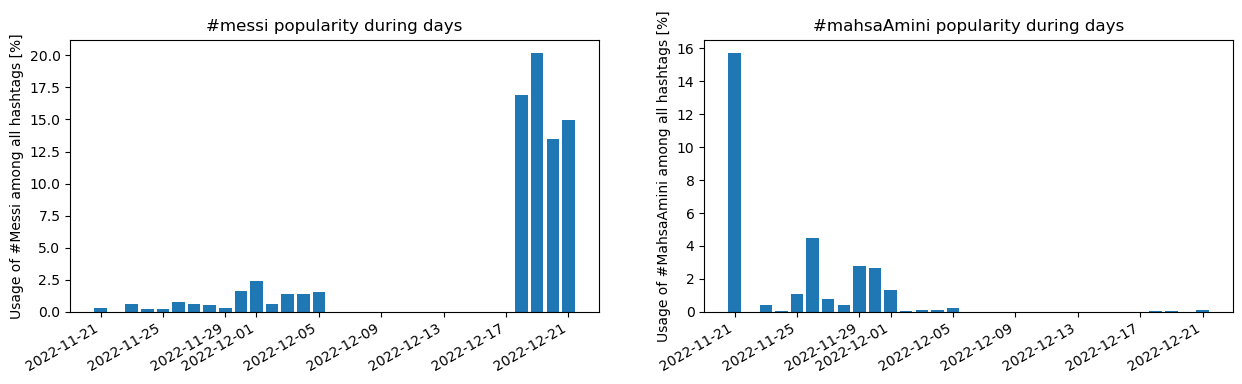

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15,4))


axs[0].bar(downloaded_dates, messi_percentage.values())
axs[0].set_title("#messi popularity during days")
axs[0].set_ylabel("Usage of #Messi among all hashtags [%]")


axs[1].bar(downloaded_dates, mahsa_percentage.values())
axs[1].set_title("#mahsaAmini popularity during days")
axs[1].set_ylabel("Usage of #MahsaAmini among all hashtags [%]")


plt.savefig('messi-mahsaamini-popularity.png')
plt.gcf().autofmt_xdate()

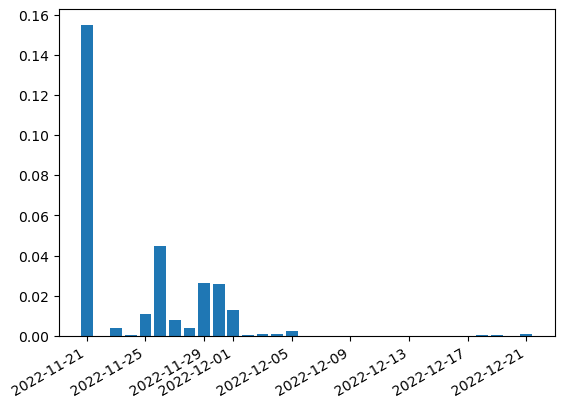

In [135]:
plt.bar(downloaded_dates, mahsa_percentage.values())
plt.gcf().autofmt_xdate()

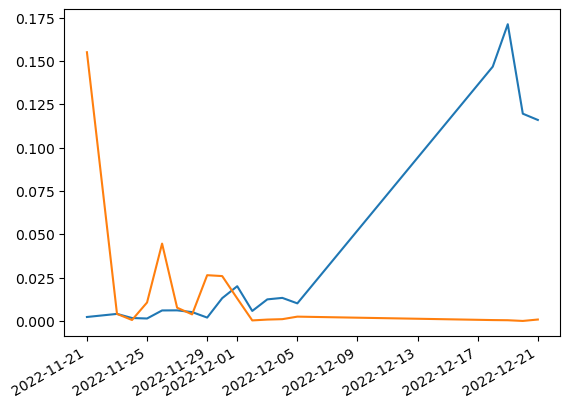

In [136]:
plt.bar(downloaded_dates, messi_percentage.values())
plt.plot(downloaded_dates, mahsa_percentage.values())
plt.gcf().autofmt_xdate()

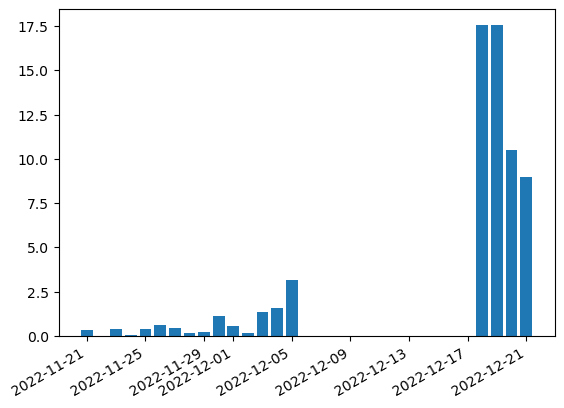

In [170]:
goat = get_dates_of_hashtag('Messi𓃵', tweets)
goat_percentage = get_daily_percentage(goat, downloaded_dates_with_occ)
plt.bar(downloaded_dates, goat_percentage.values())
plt.gcf().autofmt_xdate()

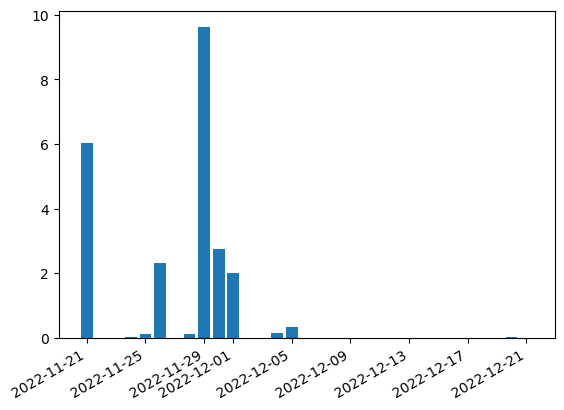

In [171]:
saytheirnames = get_dates_of_hashtag('SayTheirNames', tweets)
saytheirnames_percentage = get_daily_percentage(saytheirnames, downloaded_dates_with_occ)
plt.bar(downloaded_dates, saytheirnames_percentage.values())
plt.gcf().autofmt_xdate()

In [60]:
def occurences_in_date_dict(date_dict):
    y = []
    
    for date in downloaded_dates:
        if date in date_dict.keys():
            y.append(date_dict[date])
        else:
            y.append(0)
            
    return y

In [101]:
y = occurences_in_date_dict(messi)

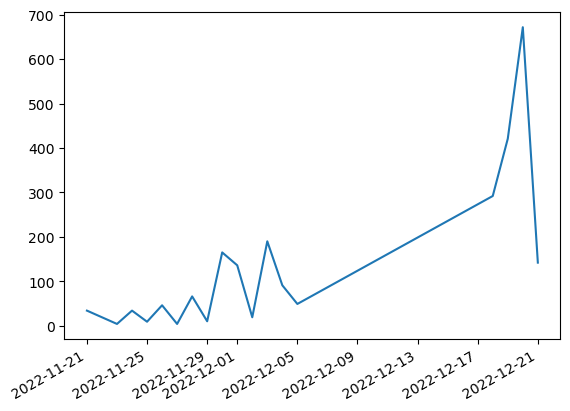

In [102]:
plt.plot(downloaded_dates, y)
plt.gcf().autofmt_xdate()

## Two periods

In [52]:
boundary_date = datetime(2022, 12 , 6).date()

first_period_tweets = tweets[tweets['created_at'] < boundary_date]
second_period_tweets = tweets[tweets['created_at'] > boundary_date]

first_period_tweets

,Unnamed: 0,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions,text_clean,text_clean_list,text_clean_stopwords,hashtags_list
0,2,#Qatar2022,1592601191761838081,1591065849531604994,Massage and sex in Qatar❤️\nMassage body to bo...,0,0,0,0,2022-11-15,en,NaN,massage and sex in qatar massage body to body ...,"['massage', 'and', 'sex', 'in', 'qatar', 'mass...","['massage', 'sex', 'qatar', 'massage', 'body',...","['Qatar', 'Qatar2022']"
1,5,#Qatar2022,1592601156412649477,968203797049769984,How to identify a whitexican in Qatar 2022 #Q...,0,1,0,0,2022-11-15,en,NaN,how to identify a whitexican in qatar #qatar ...,"['how', 'to', 'identify', 'a', 'whitexican', '...","['identify', 'whitexican', 'qatar', '#qatar', ...","['Qatar2022', 'Mexico', 'WorldCup2022']"
2,7,#Qatar2022,1592601145545031681,1585336194010955781,Gillingham vs AFC Fylde\n\n⏰ 4:45:00 PM\n\nWho...,0,0,0,0,2022-11-15,en,NaN,gillingham vs afc fylde pm whos going to win...,"['gillingham', 'vs', 'afc', 'fylde', 'pm', 'wh...","['gillingham', 'vs', 'afc', 'fylde', 'pm', 'wh...","['FIFAWorldCup', 'Qatar2022']"
3,8,#Qatar2022,1592601145503059968,1585336194010955781,Derby vs Torquay\n\n⏰ 4:45:00 PM\n\nWho's goin...,0,0,0,0,2022-11-15,en,NaN,derby vs torquay pm whos going to win #fifaw...,"['derby', 'vs', 'torquay', 'pm', 'whos', 'goin...","['derby', 'vs', 'torquay', 'pm', 'whos', 'goin...","['FIFAWorldCup', 'Qatar2022']"
4,9,#Qatar2022,1592601145415008256,1585336194010955781,Cambridge United vs Curzon Ashton\n\n⏰ 4:45:00...,0,0,0,0,2022-11-15,en,NaN,cambridge united vs curzon ashton pm whos go...,"['cambridge', 'united', 'vs', 'curzon', 'ashto...","['cambridge', 'united', 'vs', 'curzon', 'ashto...","['FIFAWorldCup', 'Qatar2022']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118422,293673,#Qatar2022,1599508958037037056,163892413,@England @FIFAWorldCup #FIFAWorldCup #Qatar202...,0,0,0,0,2022-12-04,en,"['1903382054', '138372303']",#fifaworldcup #qatar #threelions jordan pick...,"['#fifaworldcup', '#qatar', '#threelions', 'jo...","['#fifaworldcup', '#qatar', '#threelions', 'jo...","['FIFAWorldCup', 'Qatar2022', 'ThreeLions', 'W..."
118423,293675,#Qatar2022,1599508954974892033,2242933192,Best I’ve seen England play in a tournament so...,3,1,0,0,2022-12-04,en,NaN,best i’ve seen england play in a tournament so...,"['best', 'i', '’', 've', 'seen', 'england', 'p...","['best', '’', 'seen', 'england', 'play', 'tour...","['Qatar2022', 'FIFAWorldCup', 'ENGSEN']"
118424,293678,#Qatar2022,1599508945973874691,1488221783136288770,England 🏴󠁧󠁢󠁥󠁮󠁧󠁿 have progressed in six of thei...,3,0,0,0,2022-12-04,en,NaN,england have progressed in six of their eight...,"['england', 'have', 'progressed', 'in', 'six',...","['england', 'progressed', 'six', 'eight', 'rou...","['FIFAWorldCup', 'Qatar2022']"
118425,293680,#Qatar2022,1599508943914647553,171584247,Very routine looking win. Senegal gave it a go...,0,0,0,0,2022-12-04,en,NaN,very routine looking win senegal gave it a go ...,"['very', 'routine', 'looking', 'win', 'senegal...","['routine', 'looking', 'win', 'senegal', 'gave...","['ENGvSEN', 'FIFAWorldCup', 'Qatar2022']"


In [91]:
messi = get_dates_of_hashtag('Messi', first_period_tweets)
messi

{datetime.date(2022, 11, 21): 34,
 datetime.date(2022, 11, 23): 4,
 datetime.date(2022, 11, 24): 34,
 datetime.date(2022, 11, 25): 9,
 datetime.date(2022, 11, 26): 46,
 datetime.date(2022, 11, 28): 66,
 datetime.date(2022, 11, 27): 4,
 datetime.date(2022, 11, 30): 165,
 datetime.date(2022, 11, 29): 10,
 datetime.date(2022, 12, 1): 136,
 datetime.date(2022, 12, 3): 190,
 datetime.date(2022, 12, 2): 19,
 datetime.date(2022, 12, 5): 49,
 datetime.date(2022, 12, 4): 91}

In [90]:
get_dates_of_hashtag('Messi', second_period_tweets)

{datetime.date(2022, 12, 21): 142,
 datetime.date(2022, 12, 20): 672,
 datetime.date(2022, 12, 19): 421,
 datetime.date(2022, 12, 18): 292}

In [87]:
get_most_popular_hashtags(first_period_tweets, 50)

['QatarWorldCup2022',
 'FIFAWorldCup',
 'Qatar2022',
 'WorldCup2022',
 'FIFAWorldCup2022',
 'Uruguay',
 'WorldCup',
 'FIFAWorldCupQatar2022',
 'Dreamers2022',
 'SouthKorea',
 'Portugal',
 'Qatar',
 'Brazil',
 'USA',
 'URUSOU',
 'Serbia',
 'URU',
 'MahsaAmini',
 'WORLDCUP',
 'BetBot',
 'Betbuy',
 'UtilityCoin',
 'WorldcupQatar2022',
 'KOR',
 'football',
 'Cameroon',
 'PortugalvsUruguay',
 'Netherlands',
 'FIFA',
 'SayTheirNames',
 'qatar2022',
 'IranRevolution',
 'NEDUSA',
 'TUNFRA',
 'OpIran',
 'Argentina',
 'Javanroud',
 'England',
 'POR',
 'BRA',
 'AUS',
 'NED',
 'qatar',
 'TUN',
 'SUI',
 'QatarWorldCup',
 'BRASRB',
 'Suisse',
 'France',
 'worldcup']

In [92]:
get_most_popular_hashtags(second_period_tweets, 100)

['Qatar2022',
 'FIFAWorldCup',
 'QatarWorldCup2022',
 'WorldCup',
 'WorldCup2022',
 'MESSIDAY',
 'Argentina',
 'Messi',
 'Messi𓃵',
 'ArgentinaVsFrance',
 'WorldCupFinal',
 'Dextools',
 'Uniswap',
 'FIFAWorldCup2022',
 'Qatar',
 'Qatarworldcup2022',
 'QatarWorldCup',
 'Mbappe',
 'Byjusxmessi',
 'Byjus',
 'France',
 'fifa',
 'LionelMessi𓃵',
 'qatar2022',
 'FIFAWorldCupQatar2022',
 'FIFAWorldCupFinal',
 'FIFA',
 'NFT',
 'football',
 'ARGFRA',
 'messi',
 'GOAT𓃵',
 'NFTs',
 'argentina',
 'ARG',
 'GOAT',
 'Morocco',
 'Messi𓃵day',
 'LionelMessi',
 'FifaWorldCup',
 'Web3',
 'ThankYouQatar',
 'qatarworldcup2022',
 'worldcup',
 'WorldcupQatar2022',
 'Solana',
 'qatar',
 'logo',
 'audioleak',
 'fifaworldcup2022',
 'EducationforAll',
 'qatarfootball',
 'minimal',
 'minimalistlogo',
 'appicondesign',
 'logos',
 'luxury',
 'modern',
 'websitelogo',
 'modernlogo',
 'businesslogo',
 'logodesign',
 'printingitem',
 'HODL',
 'fifaworldcup',
 'worldcup2022',
 'FIFAWorldCup2022Final',
 'Football',
 'Polyg